In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.shape

(344, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
mean_impute_strategy = SimpleImputer(strategy="mean")
median_impute_strategy = SimpleImputer(strategy="median")
mode_impute_strategy = SimpleImputer(strategy="most_frequent")

data['culmen_length_mm'] = mean_impute_strategy.fit_transform(data['culmen_length_mm'].to_numpy().reshape(-1,1))
data['culmen_depth_mm'] = median_impute_strategy.fit_transform(data['culmen_depth_mm'].to_numpy().reshape(-1,1))
data['flipper_length_mm'] = mean_impute_strategy.fit_transform(data['flipper_length_mm'].to_numpy().reshape(-1,1))
data['body_mass_g'] = mean_impute_strategy.fit_transform(data['body_mass_g'].to_numpy().reshape(-1,1))
data['sex'] = mode_impute_strategy.fit_transform(data['sex'].to_numpy().reshape(-1,1))

In [7]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
data["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
data.loc[~data['sex'].isin(['FEMALE', 'MALE'])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
data = data.drop([336])
data.reset_index()

,index,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...
338,339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
339,340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
340,341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
341,342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [14]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [15]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', "species"], axis=1)
categorical_data.head()

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,MALE
4,Torgersen,FEMALE


In [17]:
le  = LabelEncoder()
data["species"] = le.fit_transform(data["species"])
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE


In [18]:
data["species"].value_counts()

0    152
2    123
1     68
Name: species, dtype: int64

In [23]:
ohe = OneHotEncoder(sparse=False, drop="first")
cat_encoded = ohe.fit_transform(categorical_data)
cat_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out())
cat_df

,island_Dream,island_Torgersen,sex_MALE
0,0.0,1.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
338,0.0,0.0,1.0
339,0.0,0.0,0.0
340,0.0,0.0,1.0
341,0.0,0.0,0.0


In [24]:
categorical_data

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,MALE
4,Torgersen,FEMALE
...,...,...
339,Biscoe,MALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


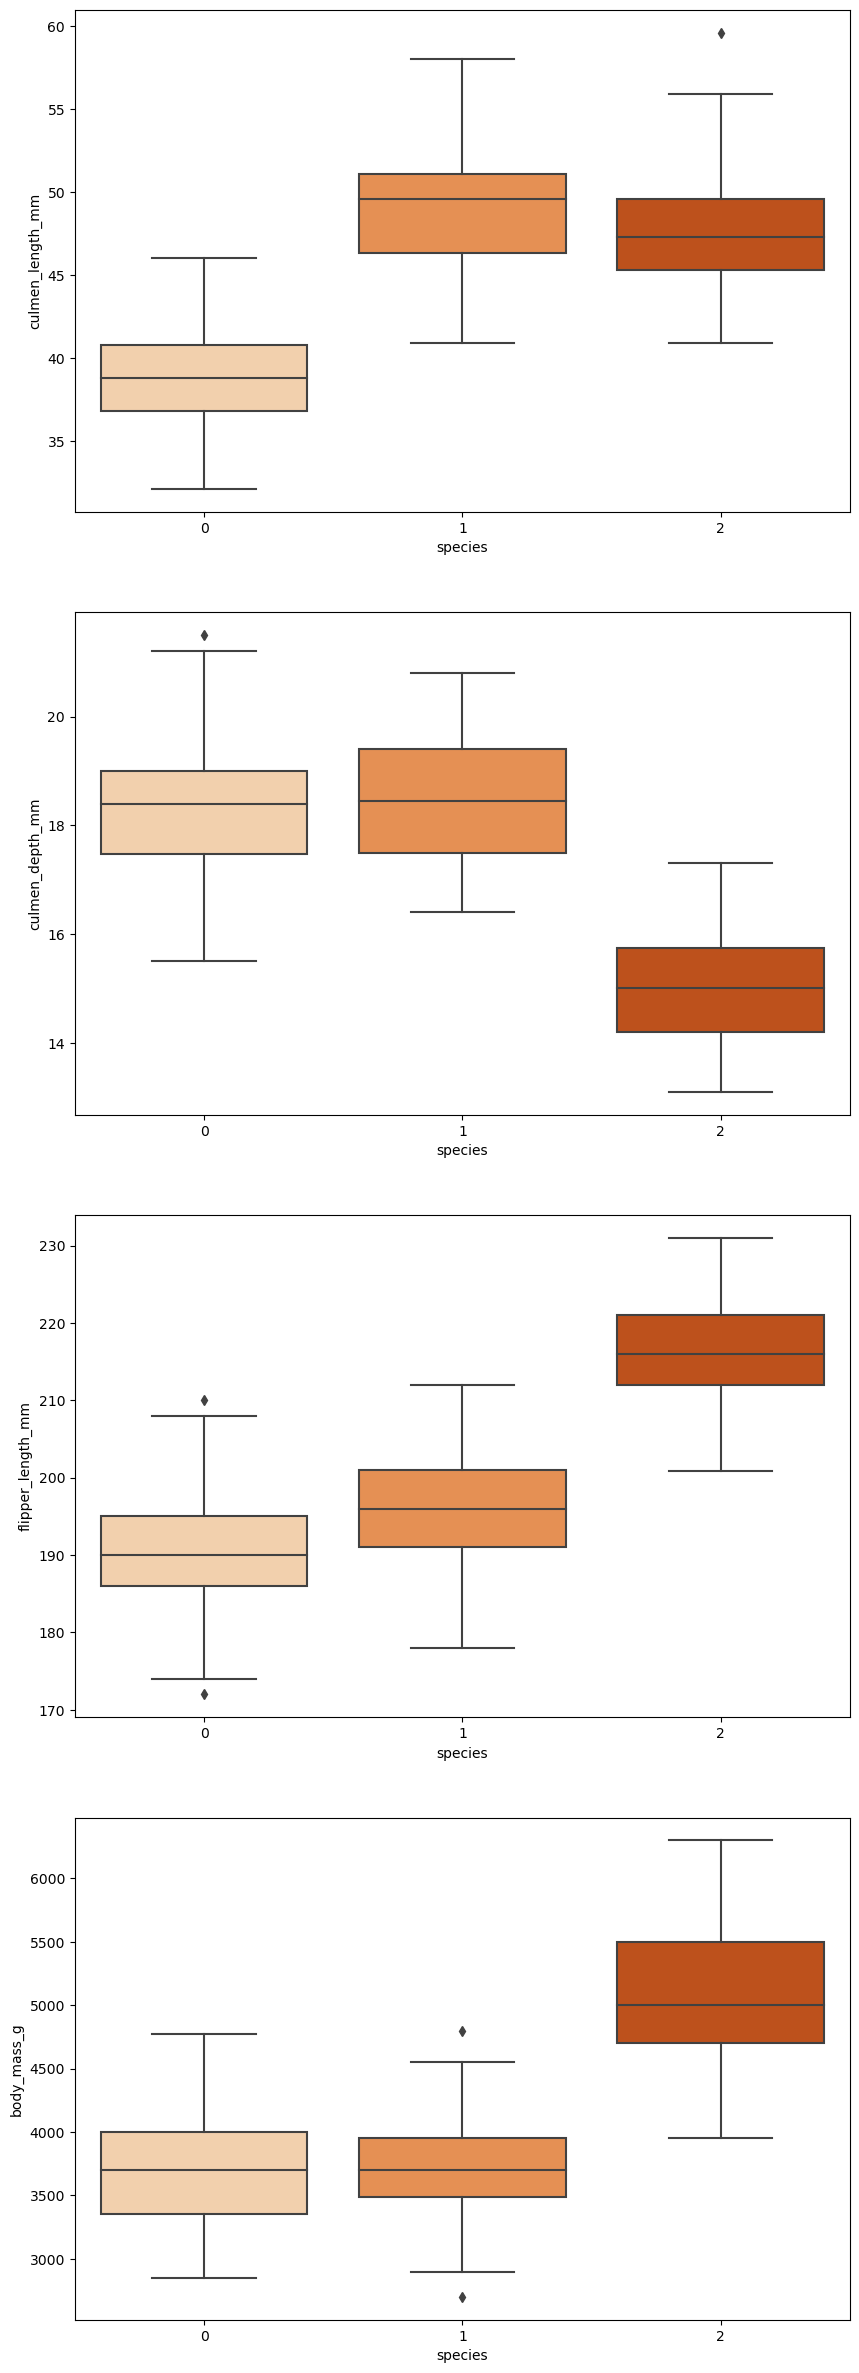

In [27]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sns.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sns.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sns.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")
plt.show()

In [29]:
scaled_data = data[['body_mass_g']].copy()
standard_scaler = StandardScaler()
standard_scaler.fit(scaled_data[['body_mass_g']])
scaled_data['body_mass_scaled'] = standard_scaler.transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())
scaled_data['body_mass_scaled']

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


0     -0.563095
1     -0.500500
2     -1.189047
3      0.002457
4     -0.938666
         ...   
339    0.002457
340    0.813998
341    1.940711
342    1.252164
343    1.502545
Name: body_mass_scaled, Length: 343, dtype: float64

In [30]:
scaled_data

,body_mass_g,body_mass_scaled
0,3750.000000,-0.563095
1,3800.000000,-0.500500
2,3250.000000,-1.189047
3,4201.754386,0.002457
4,3450.000000,-0.938666
...,...,...
339,4201.754386,0.002457
340,4850.000000,0.813998
341,5750.000000,1.940711
342,5200.000000,1.252164
